<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/21_1%ED%95%99%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_%EC%B6%9C%EC%84%9D%EA%B3%BC%EC%A0%9C%EB%AC%BC(%EB%B0%95%EC%8A%B9%ED%9D%AC%2C_202035_368335).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2번(보스턴하우징데이터)
R에 내장된 보스텀 하우징 데이터를 변형하여 로지스틱 회귀모형을 적합하고자 한다. 새로운 목표변수 y를 medv가 21보다 큰 경우 “H”로 , medv가 21보다 작거나 같은 경우 “L”로 설정하여 모형을 적합하고 결과를 해석하라. (단, medv는 모형에서 제외) (10점) *힌트:R코드 Boston$y <- ifelse(Boston$medv>21, “H”, “L”)를 활용하고 교재 참고

In [ ]:
#데이터 가져오기
library(MASS)
head(Boston, 3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
#데이터 가공
Boston$chas = factor(Boston$chas)
Boston$rad = factor(Boston$rad)
attach(Boston)

In [ ]:
#y값 생성(H,L-> 1, 0)
Boston$y = ifelse(medv>21, "H", "L")
Boston$y = ifelse(Boston$y == "H", 1, 0)
Boston.data = Boston[, -14]
head(Boston.data,3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,y
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1


In [ ]:
#로지스틱회귀모형 학습(medv변수 제외, y변수 추가)
gfit = glm(y ~ ., family = binomial, data = Boston.data)

In [ ]:
summary(gfit)


Call:
glm(formula = y ~ ., family = binomial, data = Boston.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0855  -0.3404   0.0107   0.2735   3.3064  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 12.245114   4.466858   2.741 0.006119 ** 
crim        -0.067390   0.070468  -0.956 0.338915    
zn           0.013002   0.015185   0.856 0.391873    
indus        0.006761   0.052709   0.128 0.897930    
chas1        1.598772   0.682285   2.343 0.019116 *  
nox         -5.809730   2.774655  -2.094 0.036273 *  
rm           1.579389   0.444466   3.553 0.000380 ***
age         -0.035347   0.010805  -3.271 0.001071 ** 
dis         -0.785307   0.188788  -4.160 3.19e-05 ***
rad2         1.510077   1.228375   1.229 0.218948    
rad3         1.029734   0.976940   1.054 0.291865    
rad4         0.842310   0.736668   1.143 0.252871    
rad5         0.889263   0.736687   1.207 0.227390    
rad6         1.360669   0.900094   1.512 0.13061

## 변수선택 : 단계적 선택법

In [ ]:
#단계적선택법
gfit.step.both = step(gfit, direction = "both")
gfit.step.both$anova

Start:  AIC=308.63
y ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + 
    ptratio + black + lstat

          Df Deviance    AIC
- indus    1   266.65 306.65
- zn       1   267.41 307.41
<none>         266.63 308.63
- crim     1   268.86 308.86
- black    1   269.63 309.63
- nox      1   271.16 311.16
- tax      1   271.24 311.24
- chas     1   272.44 312.44
- age      1   277.94 317.94
- rad      8   292.90 318.90
- rm       1   282.09 322.09
- dis      1   287.83 327.84
- ptratio  1   294.09 334.09
- lstat    1   312.54 352.54

Step:  AIC=306.65
y ~ crim + zn + chas + nox + rm + age + dis + rad + tax + ptratio + 
    black + lstat

          Df Deviance    AIC
- zn       1   267.42 305.41
<none>         266.65 306.65
- crim     1   268.90 306.90
- black    1   269.63 307.63
+ indus    1   266.63 308.63
- nox      1   271.32 309.32
- tax      1   271.41 309.41
- chas     1   272.44 310.44
- age      1   277.97 315.97
- rad      8   293.20 317.20
- rm       1   282.09 32

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,485,266.6340,308.6340
- indus,1,0.01635097,486,266.6503,306.6503
- zn,1,0.76464079,487,267.4150,305.4150


In [ ]:
#단계적선택법에 의해 생성된 모형 적합 결과
summary(gfit.step.both)


Call:
glm(formula = y ~ crim + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat, family = binomial, data = Boston.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9612  -0.3288   0.0114   0.2820   3.3053  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 12.606428   4.434369   2.843 0.004471 ** 
crim        -0.061190   0.066570  -0.919 0.358001    
chas1        1.631041   0.678162   2.405 0.016168 *  
nox         -5.738600   2.696998  -2.128 0.033356 *  
rm           1.580426   0.442087   3.575 0.000350 ***
age         -0.034383   0.010710  -3.210 0.001326 ** 
dis         -0.696193   0.139602  -4.987 6.13e-07 ***
rad2         1.567642   1.129834   1.387 0.165290    
rad3         0.790712   0.924014   0.856 0.392144    
rad4         0.699038   0.708445   0.987 0.323779    
rad5         0.707587   0.700076   1.011 0.312146    
rad6         1.268187   0.881091   1.439 0.150055    
rad7         2.973994   1.

##예측치와 관측치

In [ ]:
#분류표 작성(임계치 0.5로 설정)
p = predict(gfit.step.both, newdata=Boston.data , type="response")
threshold = 0.5
B.yhat = ifelse(p> threshold, 1, 0)
class.tab = table(Boston$y, B.yhat, dnn = c("Actual", "Predicted"))
class.tab

      Predicted
Actual   0   1
     0 217  32
     1  26 231

In [ ]:
#예측력측도
prediction_Accuracy = sum((Boston$y==B.yhat) / length(Boston$y))
Misclassificaton_Rate = sum((Boston$y!=B.yhat)/length(Boston$y))
Specificity = class.tab[1, 1]/apply(class.tab, 1, sum)[1]
Sensitivity = class.tab[2, 2]/apply(class.tab, 1, sum)[2]

cat("prediction_Accuracy(예측정확도) : ",prediction_Accuracy , '\n')
cat("Misclassificaton_Rate(오분류율) : ", Misclassificaton_Rate, '\n')
cat("Specificity(민감도) : ", Specificity, '\n')
cat("Sensitivity(특이도) : ",Sensitivity)

prediction_Accuracy(예측정확도) :  0.8853755 
Misclassificaton_Rate(오분류율) :  0.1146245 
Specificity(민감도) :  0.8714859 
Sensitivity(특이도) :  0.8988327

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




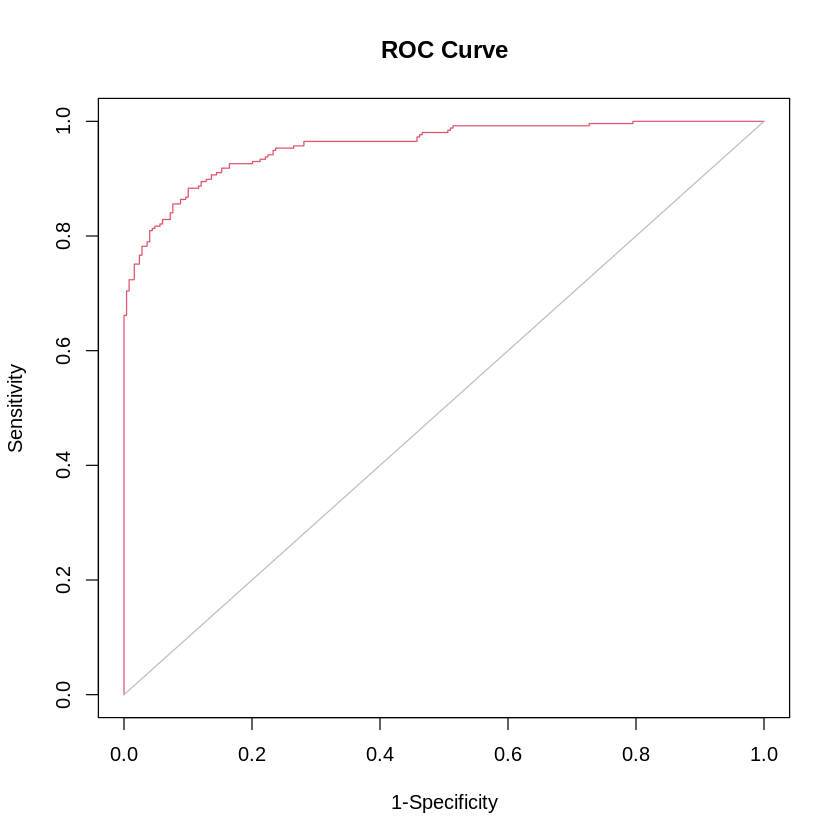

In [ ]:
#ROC 곡선 & AUC생성
install.packages("ROCR")
library(ROCR)

pred <- prediction(p, Boston$y)
perf <- performance(pred, "tpr", "fpr")
plot(perf, lty= 1, col = 2, xlim = c(0, 1), ylim = c(0, 1), xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve")
lines(x = c(0, 1), y = c(0, 1), col = "grey")

In [ ]:
#AUC 생성
AUC = performance(pred, "auc")@y.values
AUC

[[1]]
[1] 0.9573235

#3. (3) 지니지수를 이용해 최적의 분리점을 찾으시오.

In [ ]:
#데이터 가져오기
url_3 = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/table.txt"
data = read.table(url_3, header = T)
head(data)

,X1,X2,Y
,<int>,<int>,<int>
1,1,1,1
2,1,1,1
3,1,2,1
4,1,2,1
5,1,2,1
6,1,3,1


In [ ]:
#부분집합 생성 :Y=1  (1, 1) (1, 2) (2, 3)
sub.11 = subset(data, X1 == 1 & X2 == 1)
sub.12 = subset(data, X1 == 1 & X2 == 2)
sub.23 = subset(data, X1 == 2 & X2 == 3)
all.1 = rbind(sub.11, sub.12, sub.23)

In [ ]:
#부분집합 생성 :Y=0  (2, 1) (3, 1) (3, 2)
sub.21 = subset(data, X1 == 2 & X2 == 1)
sub.31 = subset(data, X1 == 3 & X2 == 1)
sub.32 = subset(data, X1 == 3 & X2 == 2)
all.0 = rbind(sub.21, sub.31, sub.32)

In [ ]:
#나머지 부분집합
sub.13 = subset(data, X1 ==1 & X2 == 3)
sub.22 = subset(data, X1 ==2 & X2 == 2)
sub.33 = subset(data, X1 ==3 & X2 == 3)

In [ ]:
#전체 데이터 갯수
data.n = nrow(data)
data.n

[1] 39

In [ ]:
#지니지수 함수
gini = function(pj1) {
  return ( 1 - (pj1^2 + (1-pj1)^2) )
}

#가중평균한 지니지수
gini2 = function(r, pj1, pj2) {
  one = gini(pj1)
  two = gini(pj2)

  return(r * one + (1-r) * two)
}

#분할개선도
t = nrow(subset(data, Y == 0)) / data.n  
gini.t = gini(t) #뿌리노드의 지니지수

gdnss = function(g) {
  return(gini.t-g)
}

In [ ]:
#뿌리 노드의 지니지수
cat("뿌리노드의 지니지수 : ", round(gini.t, 3))

뿌리노드의 지니지수 :  0.497

In [ ]:
#경우1, 좌측 :(1, 1)(1, 2)(2, 3)
case1 = all.1
n = nrow(case1)/data.n  
t1 = nrow(subset(case1, Y == 0)) / nrow(case1) 


#우측 : (2, 1)(3, 1)(3, 2) (1, 3)(2, 2)(3, 3)
remain1 = rbind(all.0, sub.13, sub.22, sub.33)
t2 = nrow(subset(remain1, Y==0)) / (data.n-nrow(case1))

#경우1 지니지수 & 분할개선도
g1 = gini2(n, t1, t2)
gdnss1 = gdnss(g1)

cat("지니지수 : ", round(g1, 3), "분할개선도 : ", round(gdnss1, 3))

지니지수 :  0.392 분할개선도 :  0.105

In [ ]:
#경우2, 좌측 :(2, 1)(3, 1)(3, 2)
case2 = all.0
n = nrow(case2)/data.n # 12/39
t1 = nrow(subset(case2, Y == 0)) / nrow(case2) # 10/12

#우측 : (1, 1)(1, 2)(2, 3) (1, 3)(2, 2)(3, 3)
remain2 = rbind(all.1, sub.13, sub.22, sub.33)
t2 = nrow(subset(remain2, Y==0)) / (data.n-nrow(case2))

#경우2 지니지수 & 분할개선도
g2 = gini2(n, t1, t2)
gdnss2 = gdnss(g2)

cat("지니지수 : ", round(g2, 2), "분할개선도 : ", round(gdnss2, 2))

지니지수 :  0.26 분할개선도 :  0.24

In [ ]:
#경우3, 좌측 :(1, 1)(1, 2)(2, 3) (1, 3)
case3 = rbind(all.1, sub.13)
n = nrow(case3)/data.n 
t1 = nrow(subset(case3, Y == 0)) / nrow(case3) 


#우측 : (2, 1)(3, 1)(3, 2) (2, 2)(3, 3)
remain3 = rbind(all.0, sub.22, sub.33)
t2 = nrow(subset(remain3, Y==0)) / (data.n-nrow(case3))

#경우3 지니지수 & 분할개선도
g3 = gini2(n, t1, t2)
gdnss3 = gdnss(g3)

cat("지니지수 : ", round(g3, 2), "분할개선도 : ", round(gdnss3, 2))

지니지수 :  0.37 분할개선도 :  0.12

In [ ]:
#경우4, 좌측 :(1, 1)(1, 2)(2, 3) (2, 2)
case4 = rbind(all.1, sub.22)
n = nrow(case4)/data.n 
t1 = nrow(subset(case4, Y == 0)) / nrow(case4)


#우측 : (2, 1)(3, 1)(3, 2) (1, 3)(3, 3)
remain4 = rbind(all.0, sub.13, sub.33)
t2 = nrow(subset(remain4, Y==0)) / (data.n-nrow(case4))

#경우4 지니지수 & 분할개선도
g4 = gini2(n, t1, t2)
gdnss4 = gdnss(g4)

cat("지니지수 : ", round(g4, 2), "분할개선도 : ", round(gdnss4, 2))

지니지수 :  0.38 분할개선도 :  0.12

In [ ]:
#경우5, 좌측 :(1, 1)(1, 2)(2, 3) (3, 3)
case5 = rbind(all.1, sub.33)
n = nrow(case5)/data.n 
t1 = nrow(subset(case5, Y == 0)) / nrow(case5)


#우측 : (2, 1)(3, 1)(3, 2) (1, 3)(2, 2)
remain5 = rbind(all.0, sub.13, sub.22)
t2 = nrow(subset(remain5, Y==0)) / (data.n-nrow(case5))

#경우5 지니지수 & 분할개선도
g5 = gini2(n, t1, t2)
gdnss5 = gdnss(g5)

cat("지니지수 : ", round(g5, 3), "분할개선도 : ", round(gdnss5, 3))

지니지수 :  0.387 분할개선도 :  0.11

In [ ]:
#경우6, 좌측 :(2, 1)(3, 1)(3, 2) (1, 3)
case6 = rbind(all.0, sub.13)
n = nrow(case6)/data.n 
t1 = nrow(subset(case6, Y == 0)) / nrow(case6)


#우측 : (1, 1)(1, 2)(2, 3) (2, 2)(3, 3)
remain6 = rbind(all.1, sub.22, sub.33)
t2 = nrow(subset(remain6, Y==0)) / (data.n-nrow(case6))

#경우6 지니지수 & 분할개선도
g6 = gini2(n, t1, t2)
gdnss6 = gdnss(g6)

cat("지니지수 : ", round(g6, 2), "분할개선도 : ", round(gdnss6, 2))

지니지수 :  0.35 분할개선도 :  0.14

In [ ]:
#경우7, 좌측 :(2, 1)(3, 1)(3, 2) (2, 2)
case7 = rbind(all.0, sub.22)
n = nrow(case7)/data.n 
t1 = nrow(subset(case7, Y == 0)) / nrow(case7)


#우측 : (1, 1)(1, 2)(2, 3)  (1, 3)(3, 3)
remain7 = rbind(all.1, sub.13, sub.33)
t2 = nrow(subset(remain7, Y==0)) / (data.n-nrow(case7))

#경우1 지니지수 & 분할개선도
g7 = gini2(n, t1, t2)
gdnss7 = gdnss(g7)

cat("지니지수 : ", round(g7, 2), "분할개선도 : ", round(gdnss7, 2))

지니지수 :  0.35 분할개선도 :  0.14

In [ ]:
#경우8, 좌측 :(2, 1)(3, 1)(3, 2) (3, 3)
case8 = rbind(all.0, sub.33)
n = nrow(case8)/data.n 
t1 = nrow(subset(case8, Y == 0)) / nrow(case8)


#우측 : (1, 1)(1, 2)(2, 3)  (1, 3)(2, 2)
remain8 = rbind(all.1, sub.13, sub.22)
t2 = nrow(subset(remain8, Y==0)) / (data.n-nrow(case8))

#경우8 지니지수 & 분할개선도
g8 = gini2(n, t1, t2)
gdnss8 = gdnss(g8)

cat("지니지수 : ", round(g8, 2), "분할개선도 : ", round(gdnss8, 2))

지니지수 :  0.31 분할개선도 :  0.18

#3. (4) 뿌리노드가 한번 분할된 분류나무를 생성하고, 두 자식노드에서 관찰치들의 집단별빈도를 밝히시오

In [ ]:
#패키지 가져오기
library(rpart)

In [ ]:
#옵션 선택(한번만 분할된 분류나무)
my.control = rpart.control(xval = 10, cp = -0.1, minsplit = 1, maxdepth = 1)

#CART나무모형 - 지니지수로 실행
fit.data = rpart(Y ~., data = data, method = "class", control = my.control)
print(fit.data)

n= 39 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 39 18 0 (0.5384615 0.4615385)  
  2) X1>=2.5 15  2 0 (0.8666667 0.1333333) *
  3) X1< 2.5 24  8 1 (0.3333333 0.6666667) *


결과값 의미
1. 노드번호
2. 분할규칙
3. 해당 노드의 총관측치 수
4. 해당 노드에서 오분류되는 관측치 수 (Y=1, 18개)
5. 해당 노드의 목표변수 예측치의 순서
6. 괄호 : 목표변수의 집단별 비율(y=0, y=1)

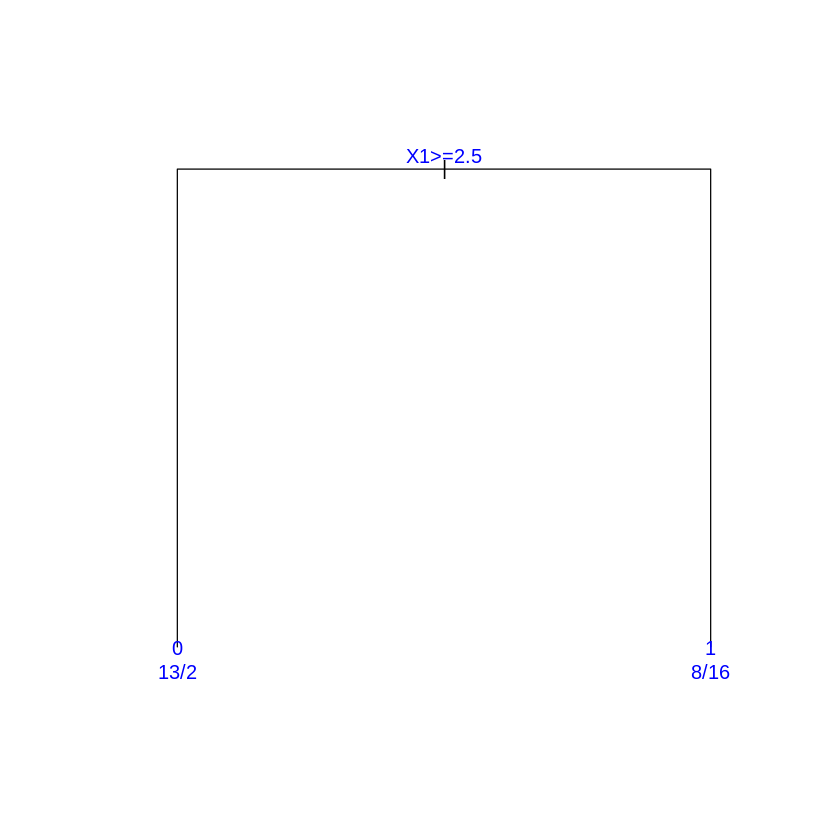

In [ ]:
#나무모형 시각화
plot(fit.data, uniform = T, compress = T, margin = 0.1)
text(fit.data, use.n = T, col = "blue")

#3. (5) 위에서 생성된 분류나무의 오분류율을 계산하시오.

In [ ]:
#분류예측치 구하기
pred.data = predict(fit.data, newdata = data, type = "class")

In [ ]:
#오분류표
tab = table(data$Y, pred.data, dnn = c("Actual", "Predicted"))
print(tab)

      Predicted
Actual  0  1
     0 13  8
     1  2 16


In [ ]:
#오분류율
round(1-sum(diag(tab))/(sum(tab)), 2)

[1] 0.26